<a href="https://colab.research.google.com/github/ustab/GUIDED_PROJECTS_STUDIES/blob/main/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, I  built and evaluated multiple linear regression models using Python. I used scikit-learn to calculate the regression, while using pandas for data management and seaborn for plotting. The data for this project consists of the very popular Advertising dataset to predict sales revenue based on advertising spending through media such as TV, radio, and newspaper.
I did this project under the guidance of the Instructer;
* Snehan Kekre is a Machine Learning and Data Science Instructor at Rhyme.  He will graduate in 2021 with a BSc in Computer Science and Artificial  Intelligence from Minerva Schools at KGI, based in San Francisco* 

<h3>please check my study by the link below;<h3>

https://www.coursera.org/account/accomplishments/certificate/XUD6EVR8486L


<h1 align="center">Multiple Linear Regression<bold></h1>

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

**Simple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X + \epsilon$$</h5>

**Multiple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+ \beta_p X_p + \epsilon$$ </h5>
<h5 align=center> $$sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$ </h5>

### Task 1: Importing Libraries

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [146]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

### Task 2: Load the Data

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.

In [147]:
df=pd.read_csv('/content/Advertising (2).csv')

In [148]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [149]:
df.shape

(200, 4)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [151]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [152]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

### Task 3: Relationship between Features and Response

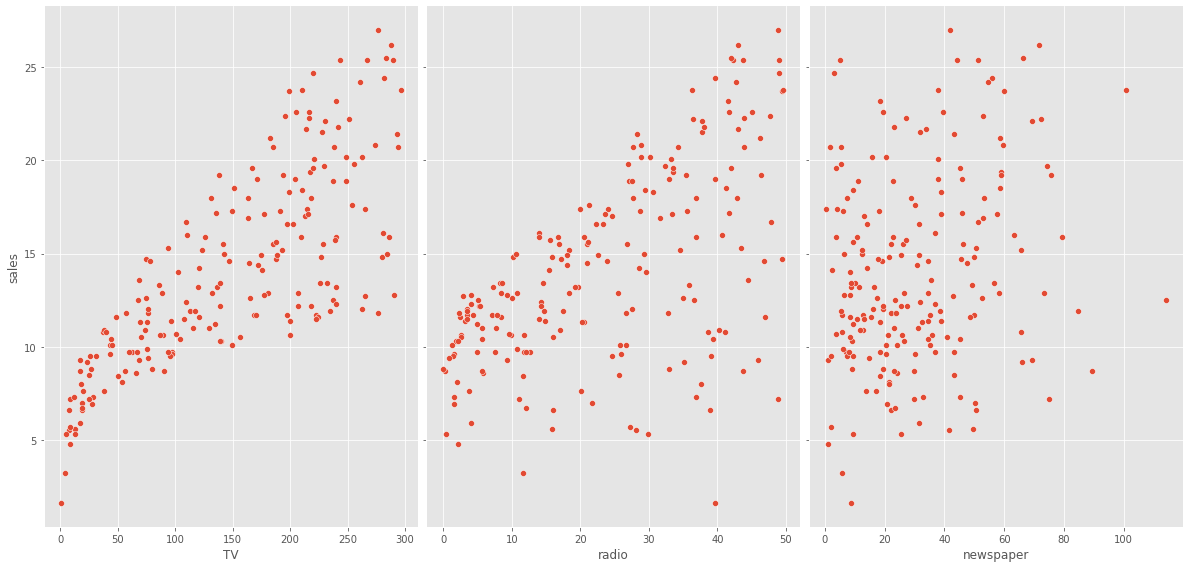

In [153]:
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars= ['sales'], height=8, aspect=0.7);

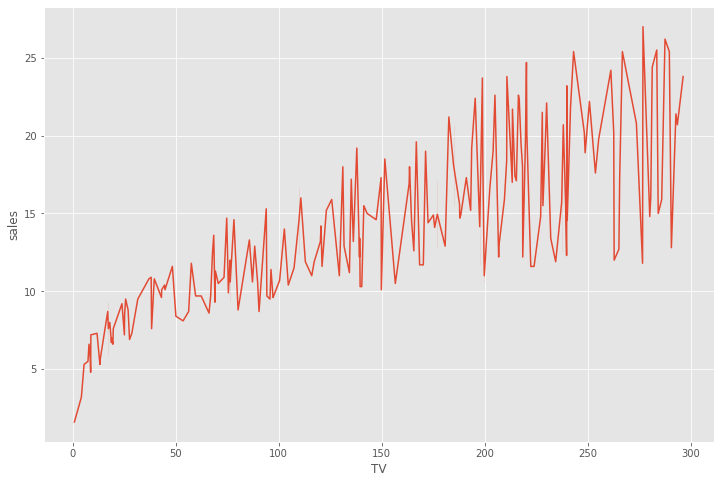

In [154]:
sns.lineplot(data=df, x='TV', y='sales');

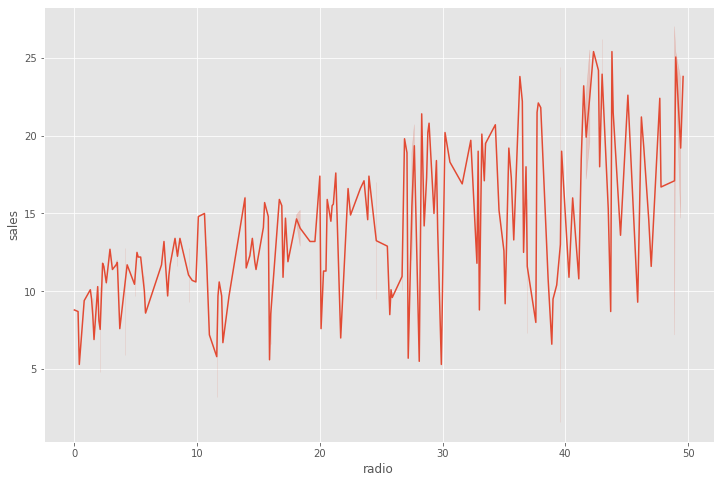

In [155]:
sns.lineplot(data=df, x='radio', y='sales');

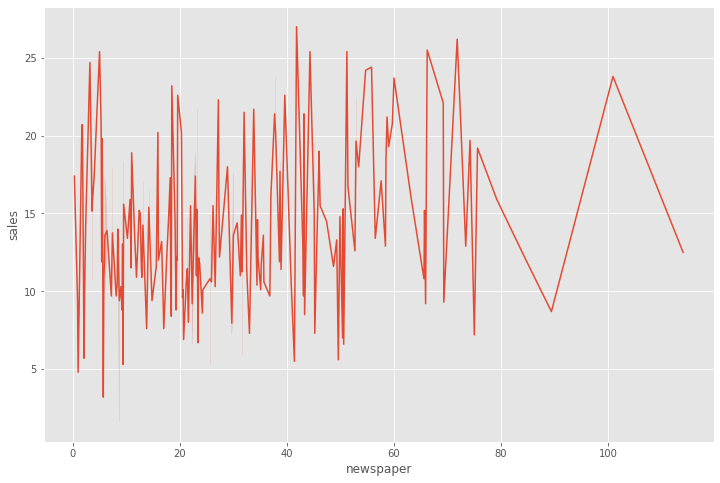

In [156]:
sns.lineplot(data=df, x='newspaper', y='sales');

### Task 4: Multiple Linear Regression - Estimating Coefficients

Y=β0+β1X1+β2X2+...+βpXp+ϵ 
sales=β0+β1×TV+β2×radio+β3×newspaper+ϵ

In [241]:
df=pd.read_csv('/content/Advertising (2).csv')
df.head(2)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [242]:
import numpy as np
from sklearn.linear_model import LinearRegression
lml=LinearRegression()

In [243]:
X=df[['TV', 'radio', 'newspaper']]
X.head(2)

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1


In [244]:
y=X=df[['sales']]
y.head(2)

,sales
0,22.1
1,10.4


In [245]:
lml.fit(X,y)

LinearRegression()

In [246]:
print(lml.intercept_)

[-7.10542736e-15]


In [247]:
print(lml.coef_)

[[1.]]


In [248]:
print(list(zip(['TV', 'radio', 'newspaper'], lml.coef_)))

[('TV', array([1.]))]


In [249]:
X=list(zip(['TV', 'radio']))

In [250]:
X=df[['TV', 'radio']]

In [251]:
X.head()

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


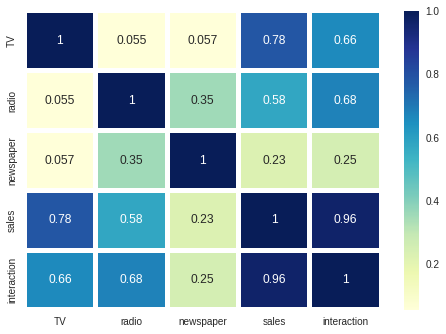

In [312]:
sns.heatmap(df.corr(), annot=True, linewidth=4, cmap='YlGnBu'); 

### Task 5: Feature Selection

In [253]:
from sklearn.metrics import r2_score
lml2=LinearRegression()

In [254]:
lml2.fit(X, y)

LinearRegression()

In [314]:
lml2_pred=y
lml2_pred.head(2)

0    22.1
1    10.4
Name: sales, dtype: float64

In [315]:
lml2.fit(X[['TV','radio']],y)
lml2_pred=lml2.predict(X[['TV','radio']])
print('R2:', r2_score(y,lml2_pred))

R2: 0.8971942610828957


In [262]:
X=df[['TV', 'radio', 'newspaper']]

In [264]:
lml3=LinearRegression()
lml3.fit(X[['TV','radio','newspaper']],y)
lml3_pred=lml3.predict(X[['TV','radio','newspaper']])
print('R2:',r2_score(y,lml3_pred))

R2: 0.8972106381789522


### Task 6: Model Evaluation Using Train/Test Split and Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} \left |y_i - \hat{y_i} \right |$$</h5>
**Mean Squared Error** (MSE) is the mean of the squared errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$</h5>
**Root Mean Squared Error** (RMSE) is the mean of the squared errors: <h5 align=center>$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$</h5>

In [268]:
X=df

In [317]:
X.head(1)

,TV,radio,interaction
0,230.1,37.8,8697.78


In [277]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [278]:
lml4=LinearRegression()
X=df.drop('sales',axis=1)
y=df['sales']
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [279]:
lml4=lml4.fit(x_train,y_train)
lml4_pred=lml4.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,lml4_pred)))
print("R2:",r2_score(y_test,lml4_pred))

RMSE: 1.404651423032895
R2: 0.9156213613792232


In [281]:
X=df
X.head(1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1


In [282]:
X=df.drop(['sales','newspaper'],axis=1)
y=df['sales']
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [283]:
lml5=LinearRegression().fit(x_train,y_train)
lml5_pred=lml5.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,lml5_pred)))
print("R2:",r2_score(y_test,lml5_pred))

RMSE: 1.3879034699382888
R2: 0.9176214942248907


Let's use train/test split with RMSE to see whether newspaper should be kept in the model:

In [286]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


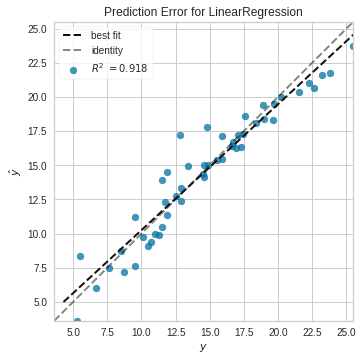

In [298]:
visualizer=PredictionError(lml5).fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof();

### Task 7: Interaction Effect (Synergy)

In [301]:
df.head(1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1


In [303]:
df['interaction']=df['TV']*df['radio']
X=df[['TV','radio','interaction']]
y=df['sales']
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1)                                       

In [308]:
lml6=LinearRegression().fit(x_train,y_train)
lml6_pred=lml6.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,lml6_pred)))
print("R2:",r2_score(y_test,lml6_pred))

RMSE: 0.7011871137164328
R2: 0.978973681468126


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


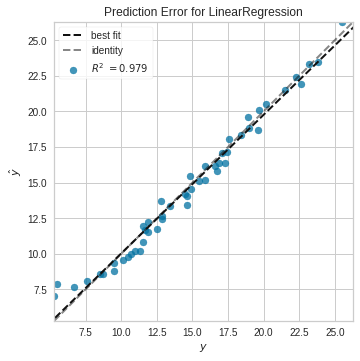

In [311]:
visualizer=PredictionError(lml6).fit(x_train,y_train)
visualizer.score(x_test, y_test)
visualizer.poof();